In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline

In [6]:
df = pd.read_csv('Company_Data.csv')

In [7]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [8]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

# EDA

<Axes: >

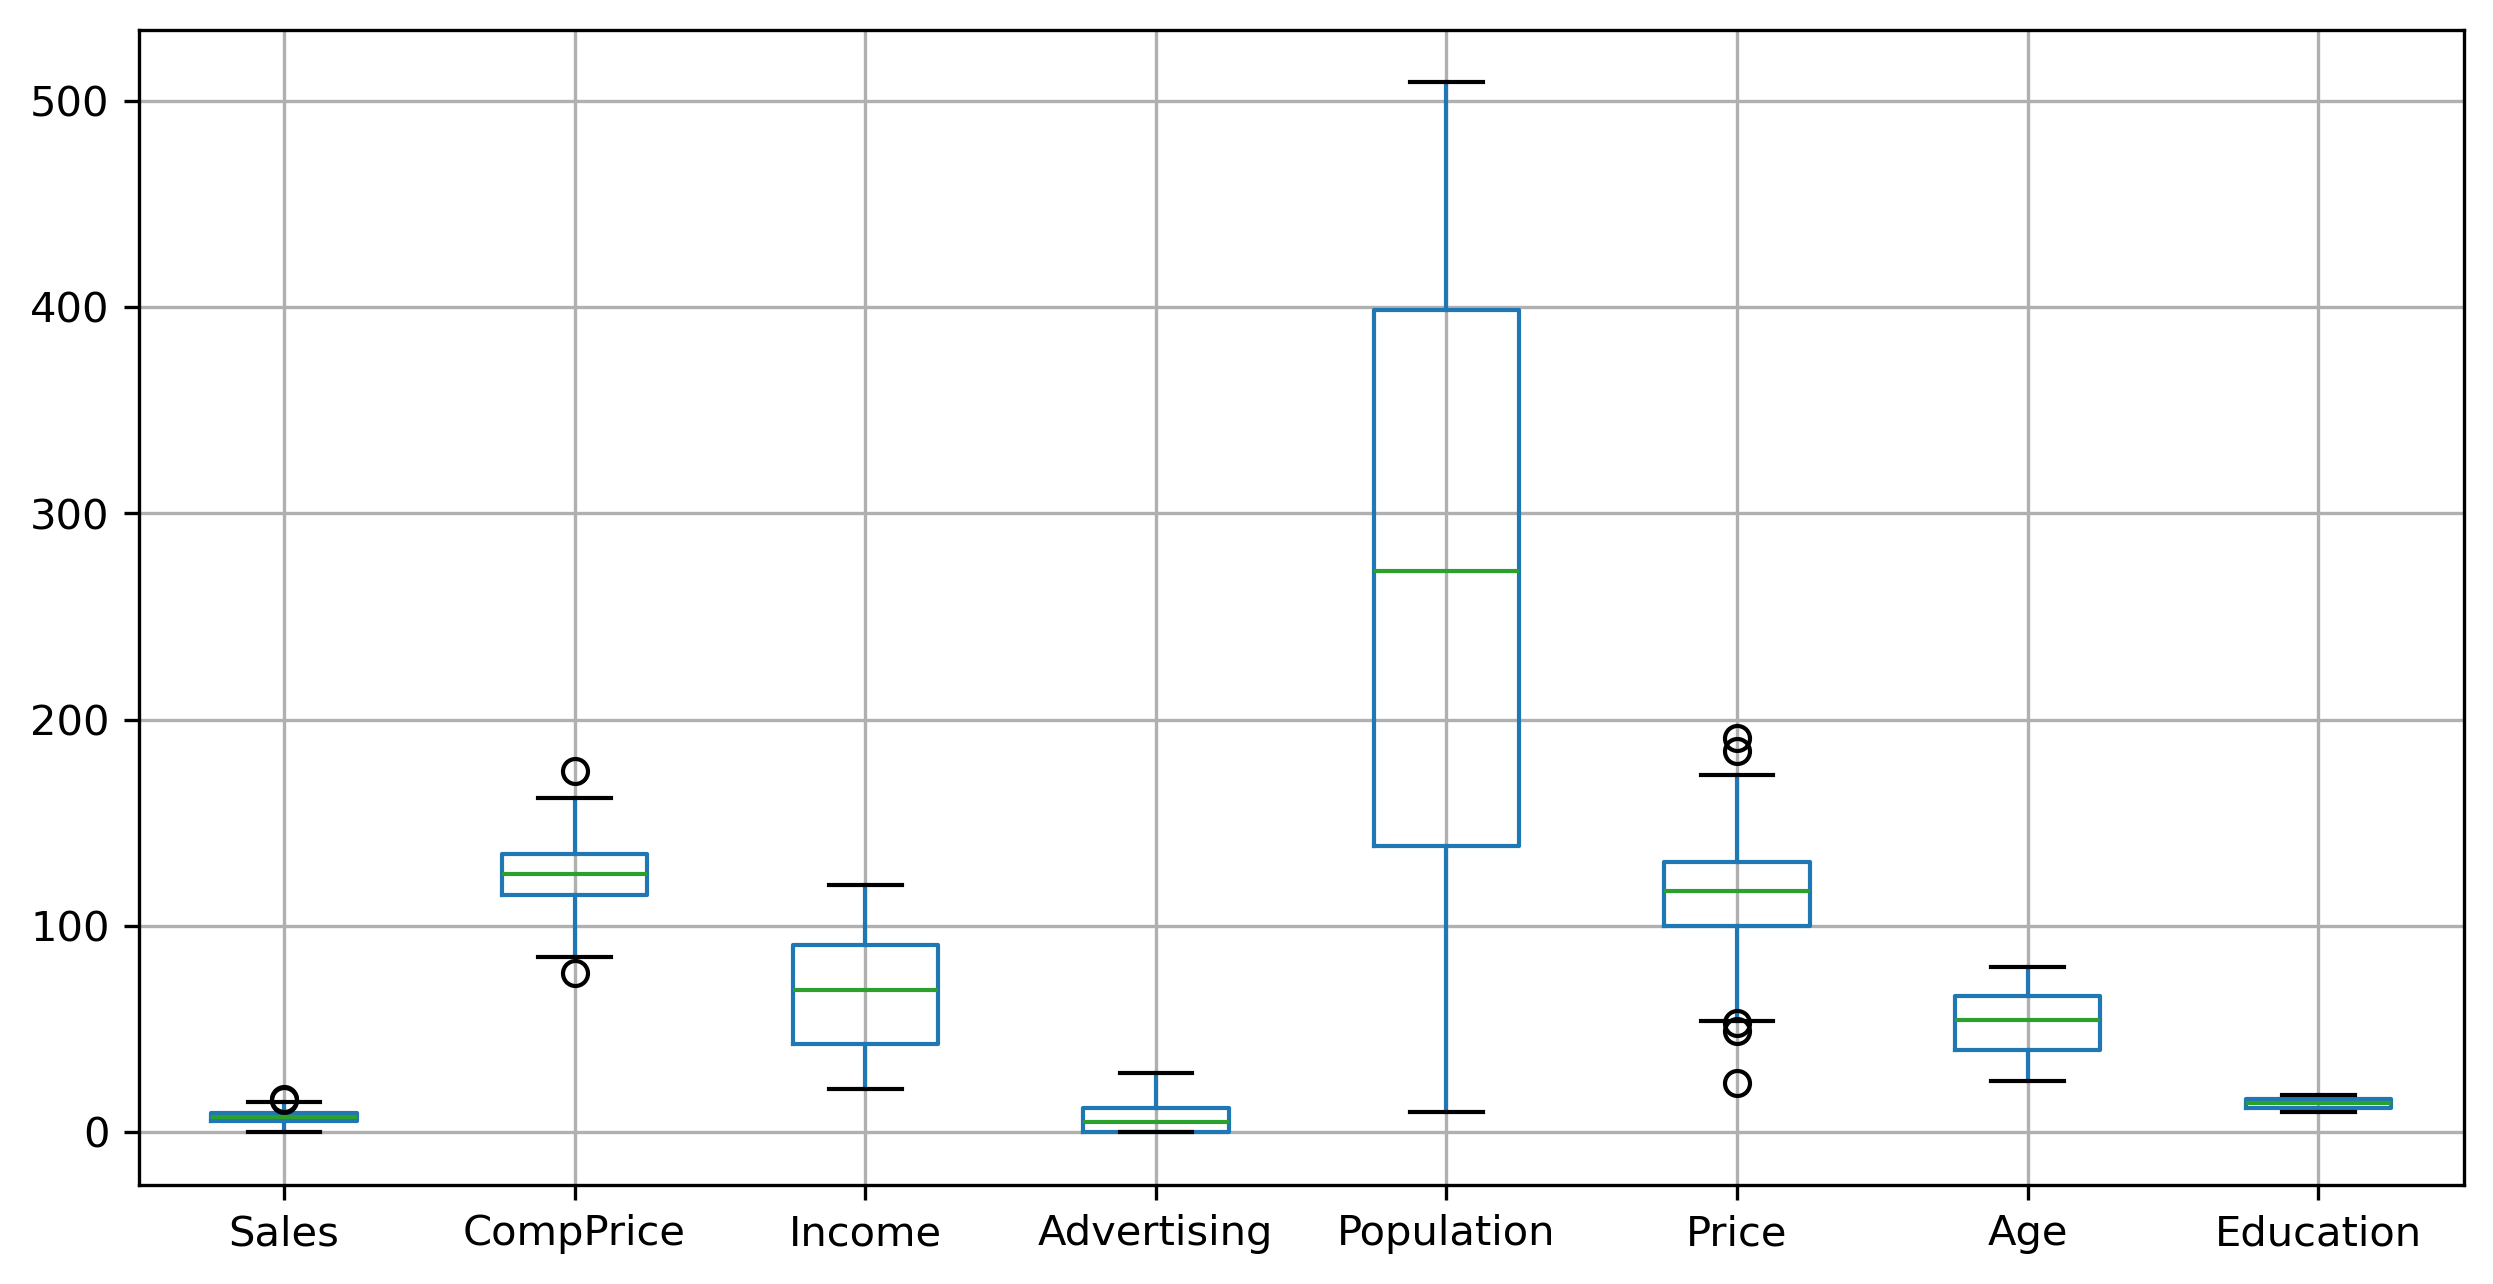

In [9]:
df.boxplot()

In [10]:
def replace_outliers_with_iqr_capping(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Replace outliers with capped values
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

In [11]:
df = replace_outliers_with_iqr_capping(df, 'Sales', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'CompPrice', threshold=1.5)
df = replace_outliers_with_iqr_capping(df, 'Price', threshold=1.5)

<Axes: >

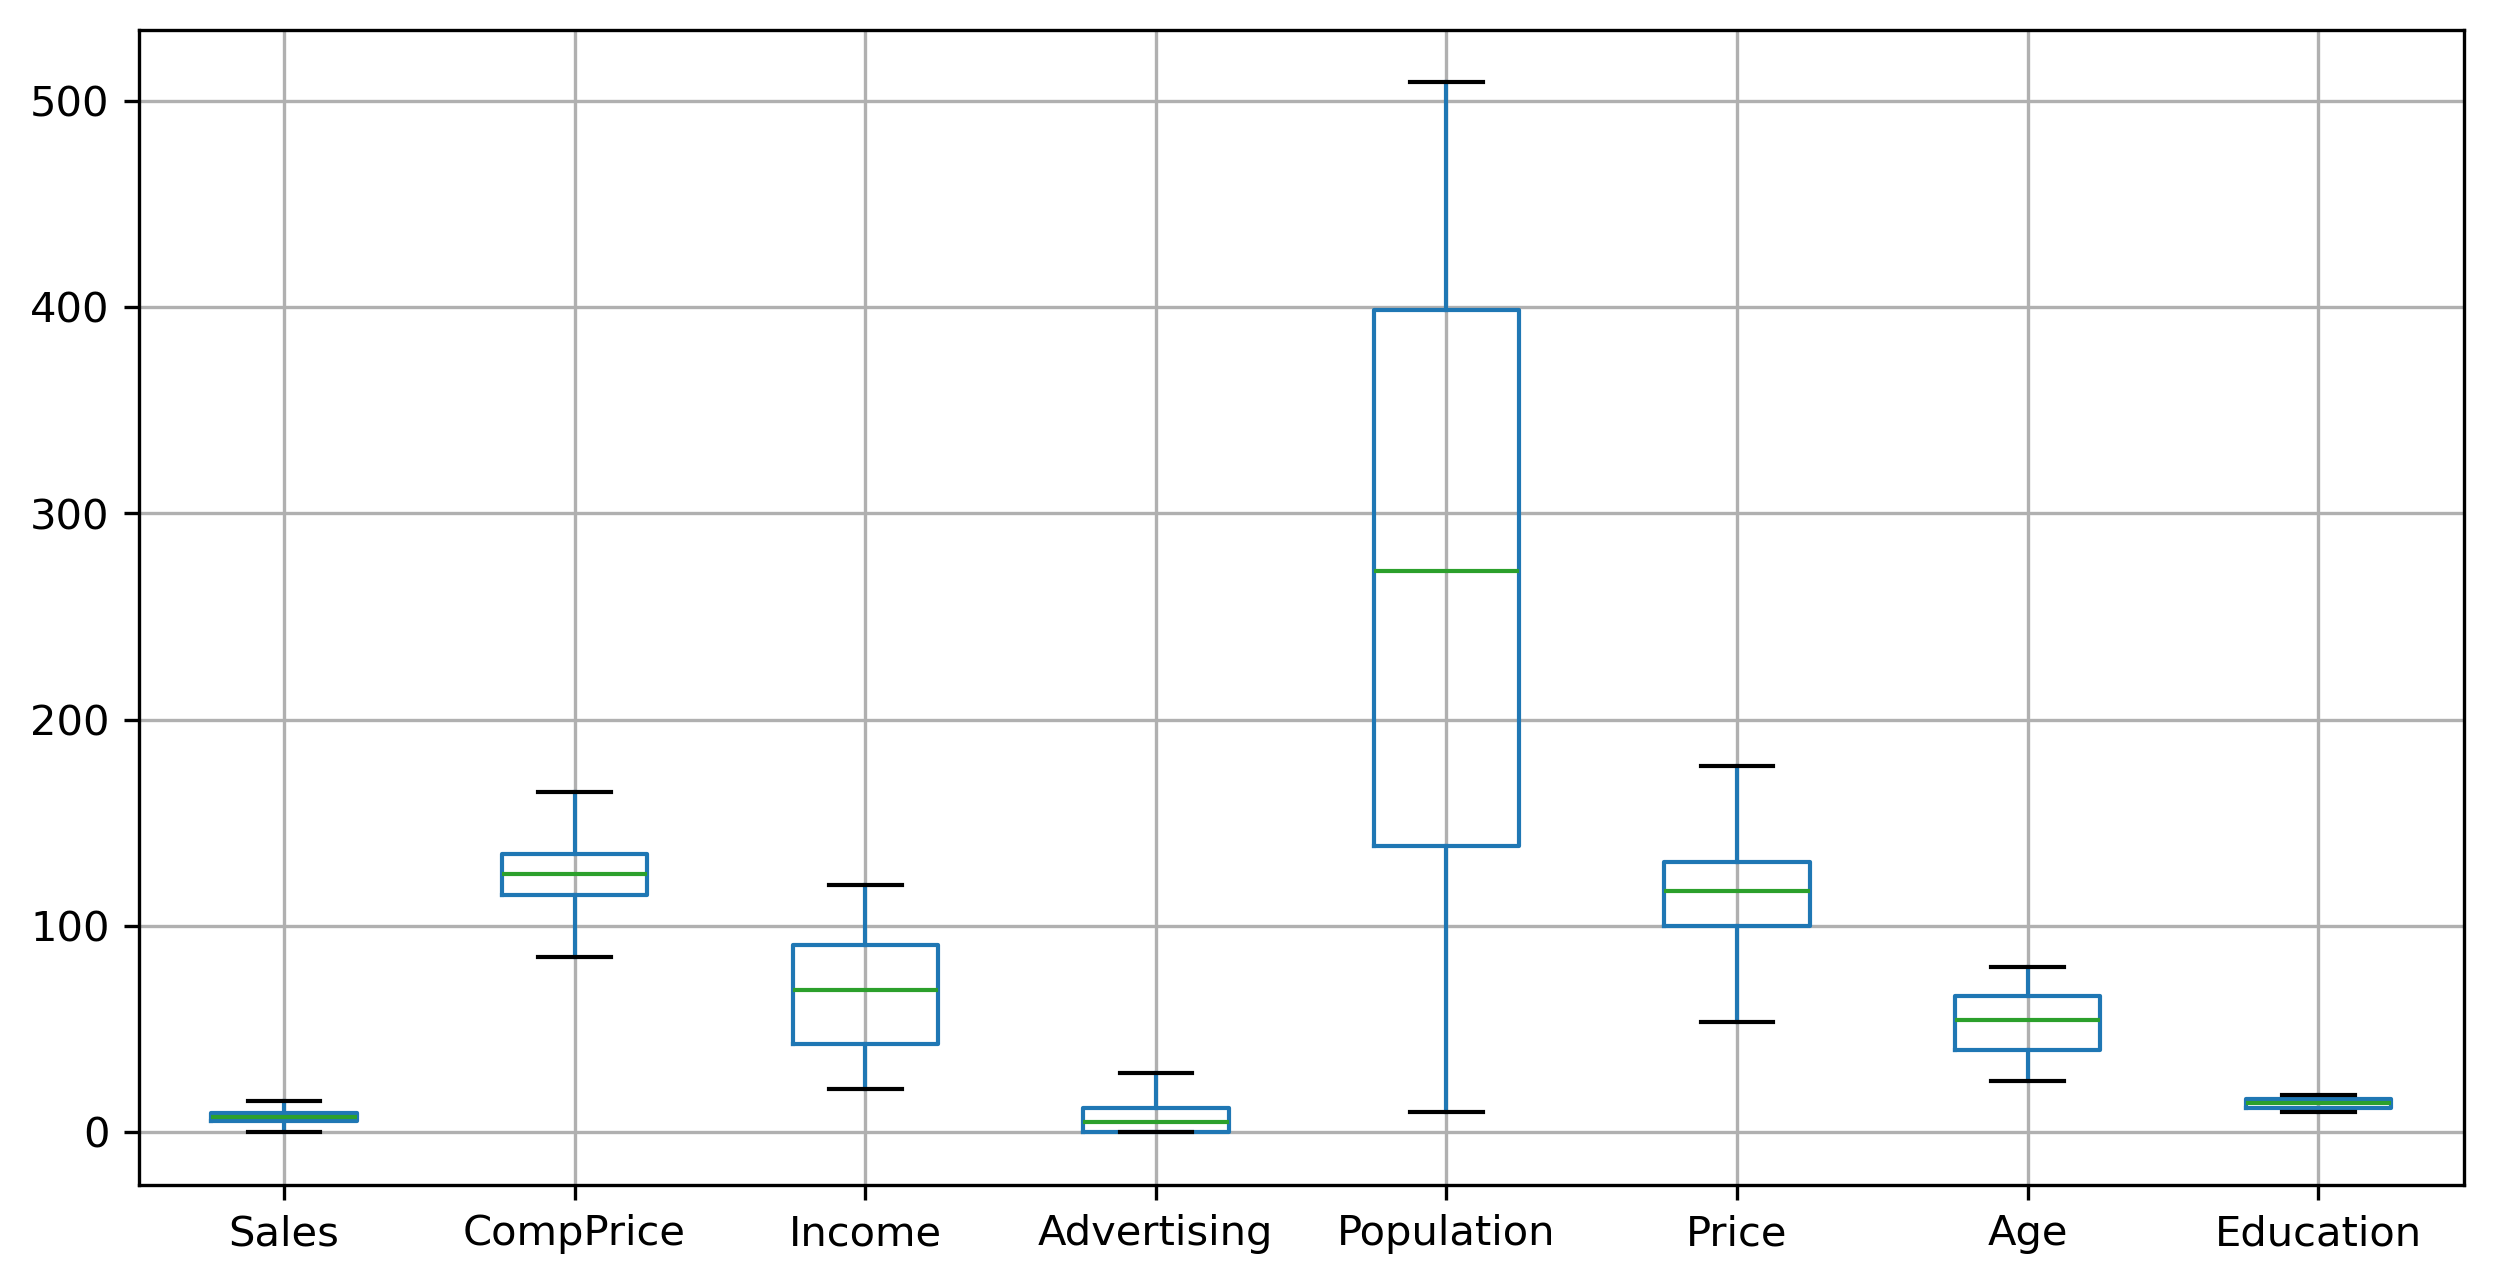

In [12]:
df.boxplot()

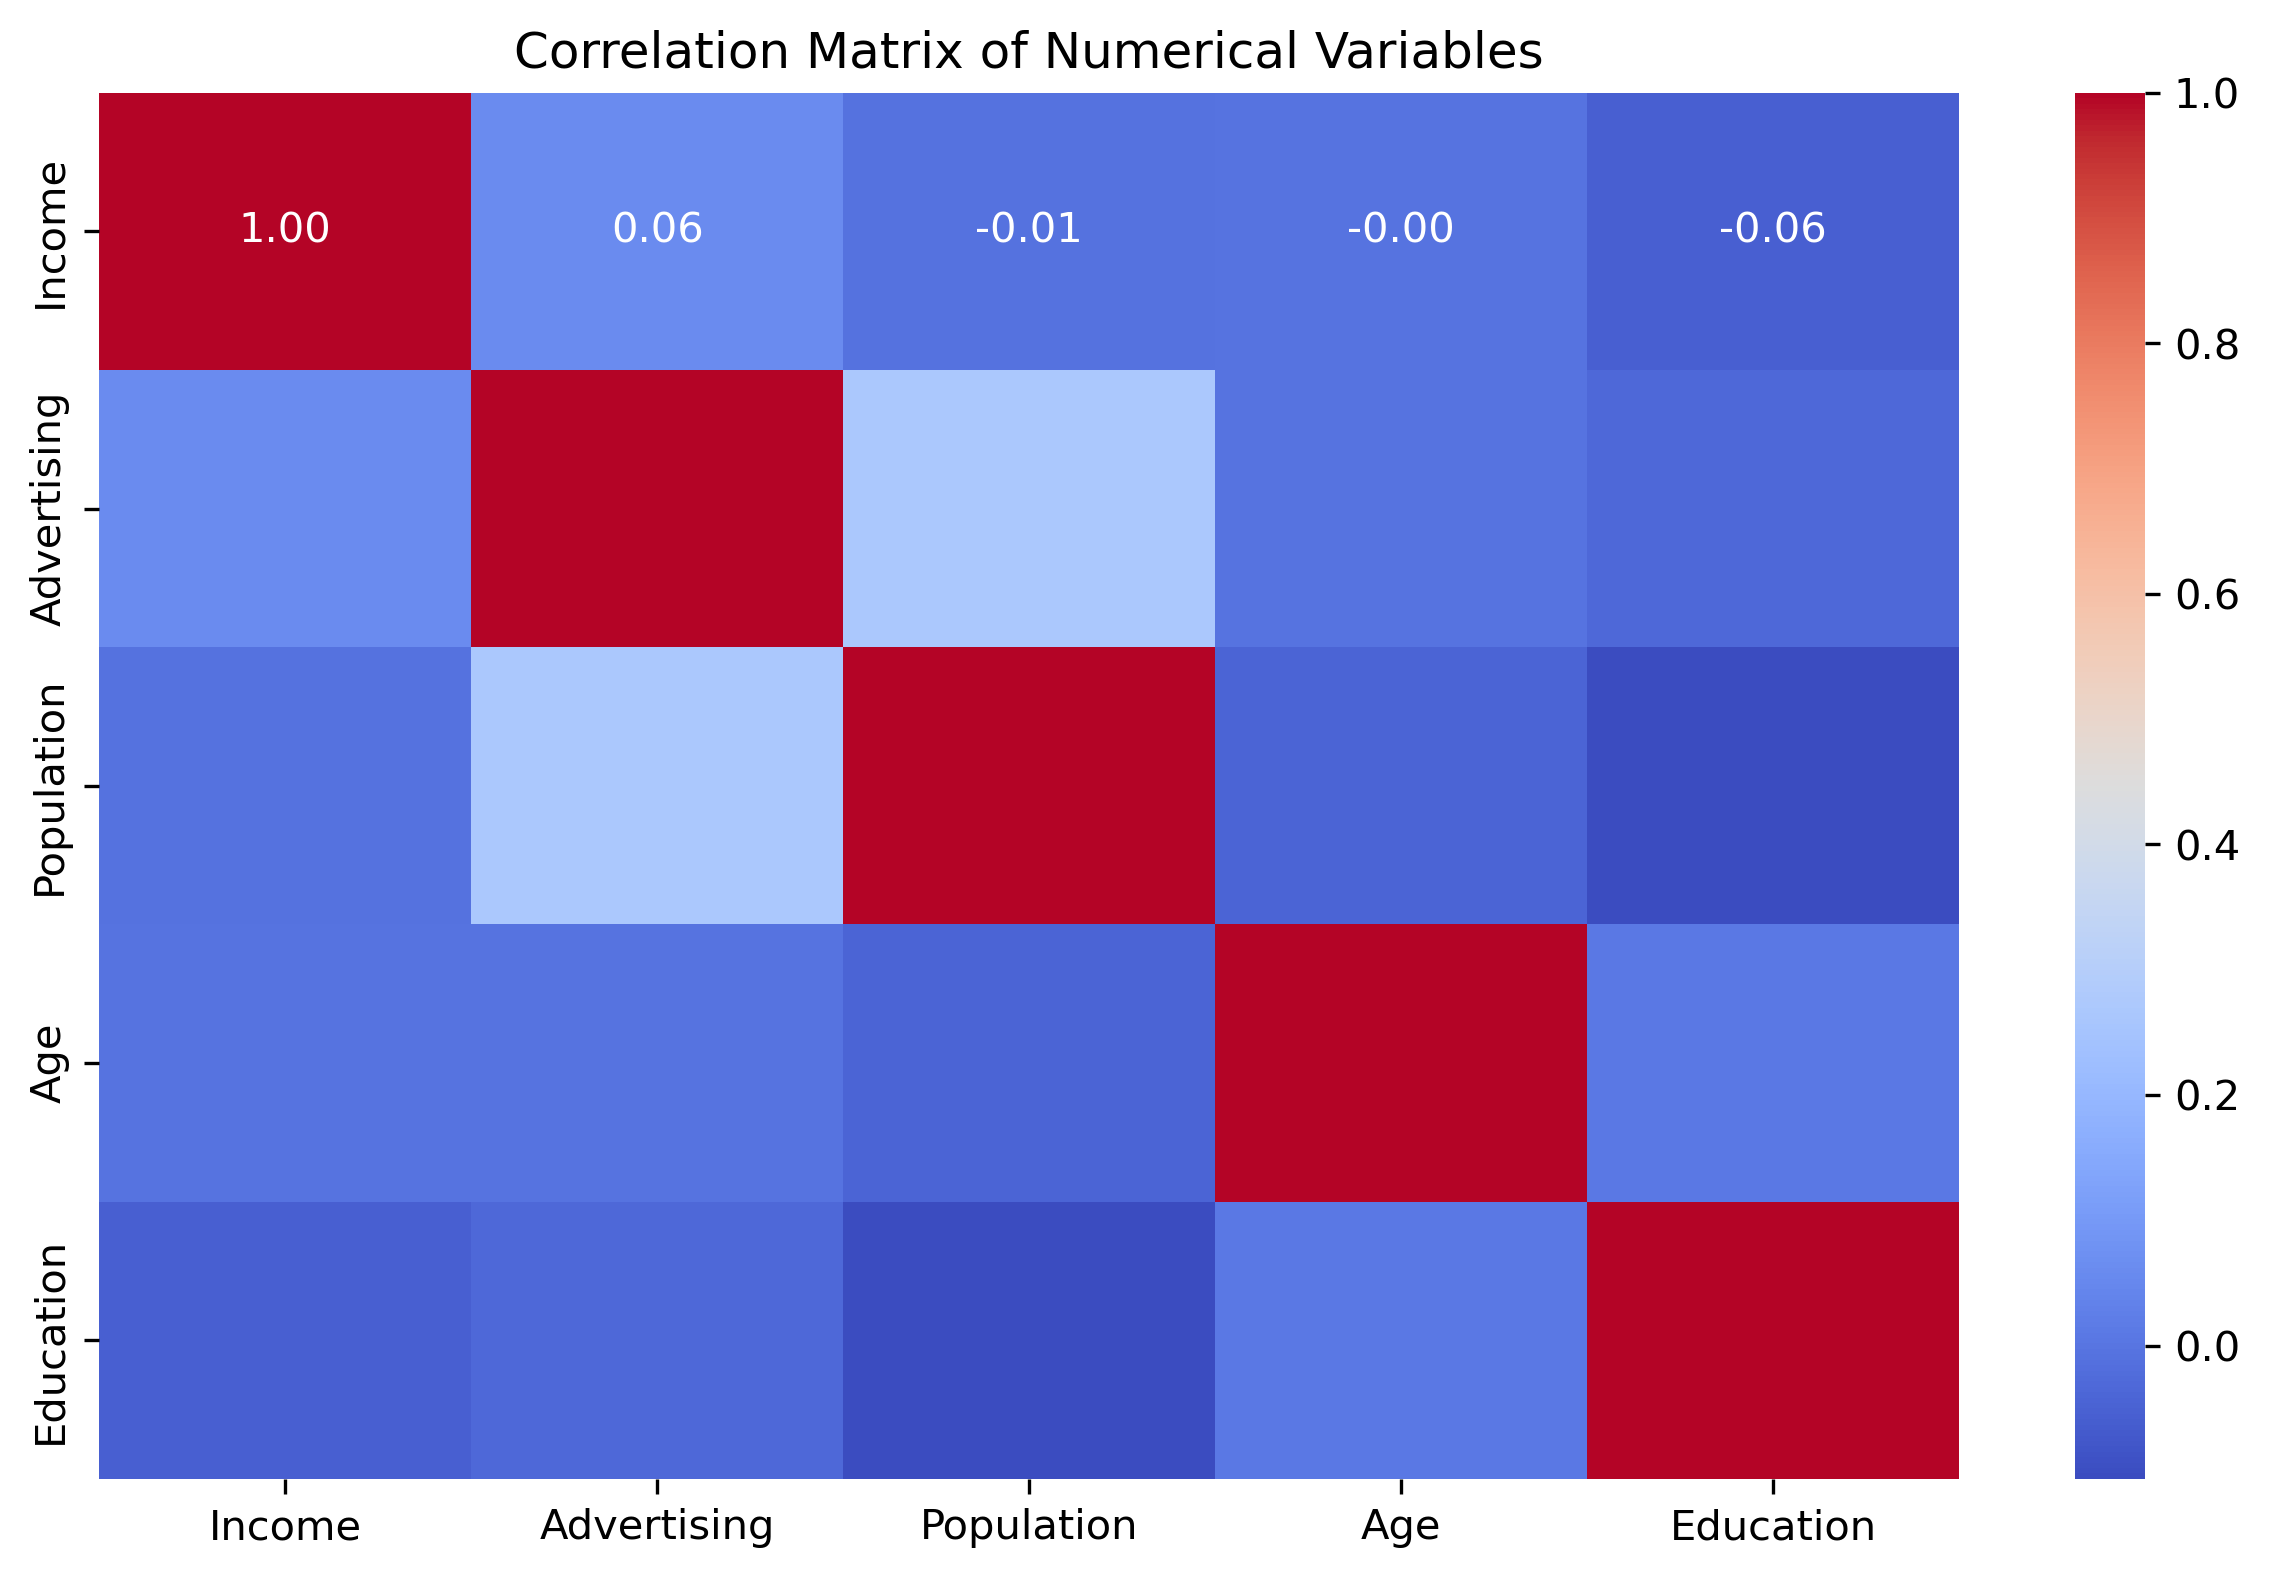

In [13]:
numerical_features = df.select_dtypes(int).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

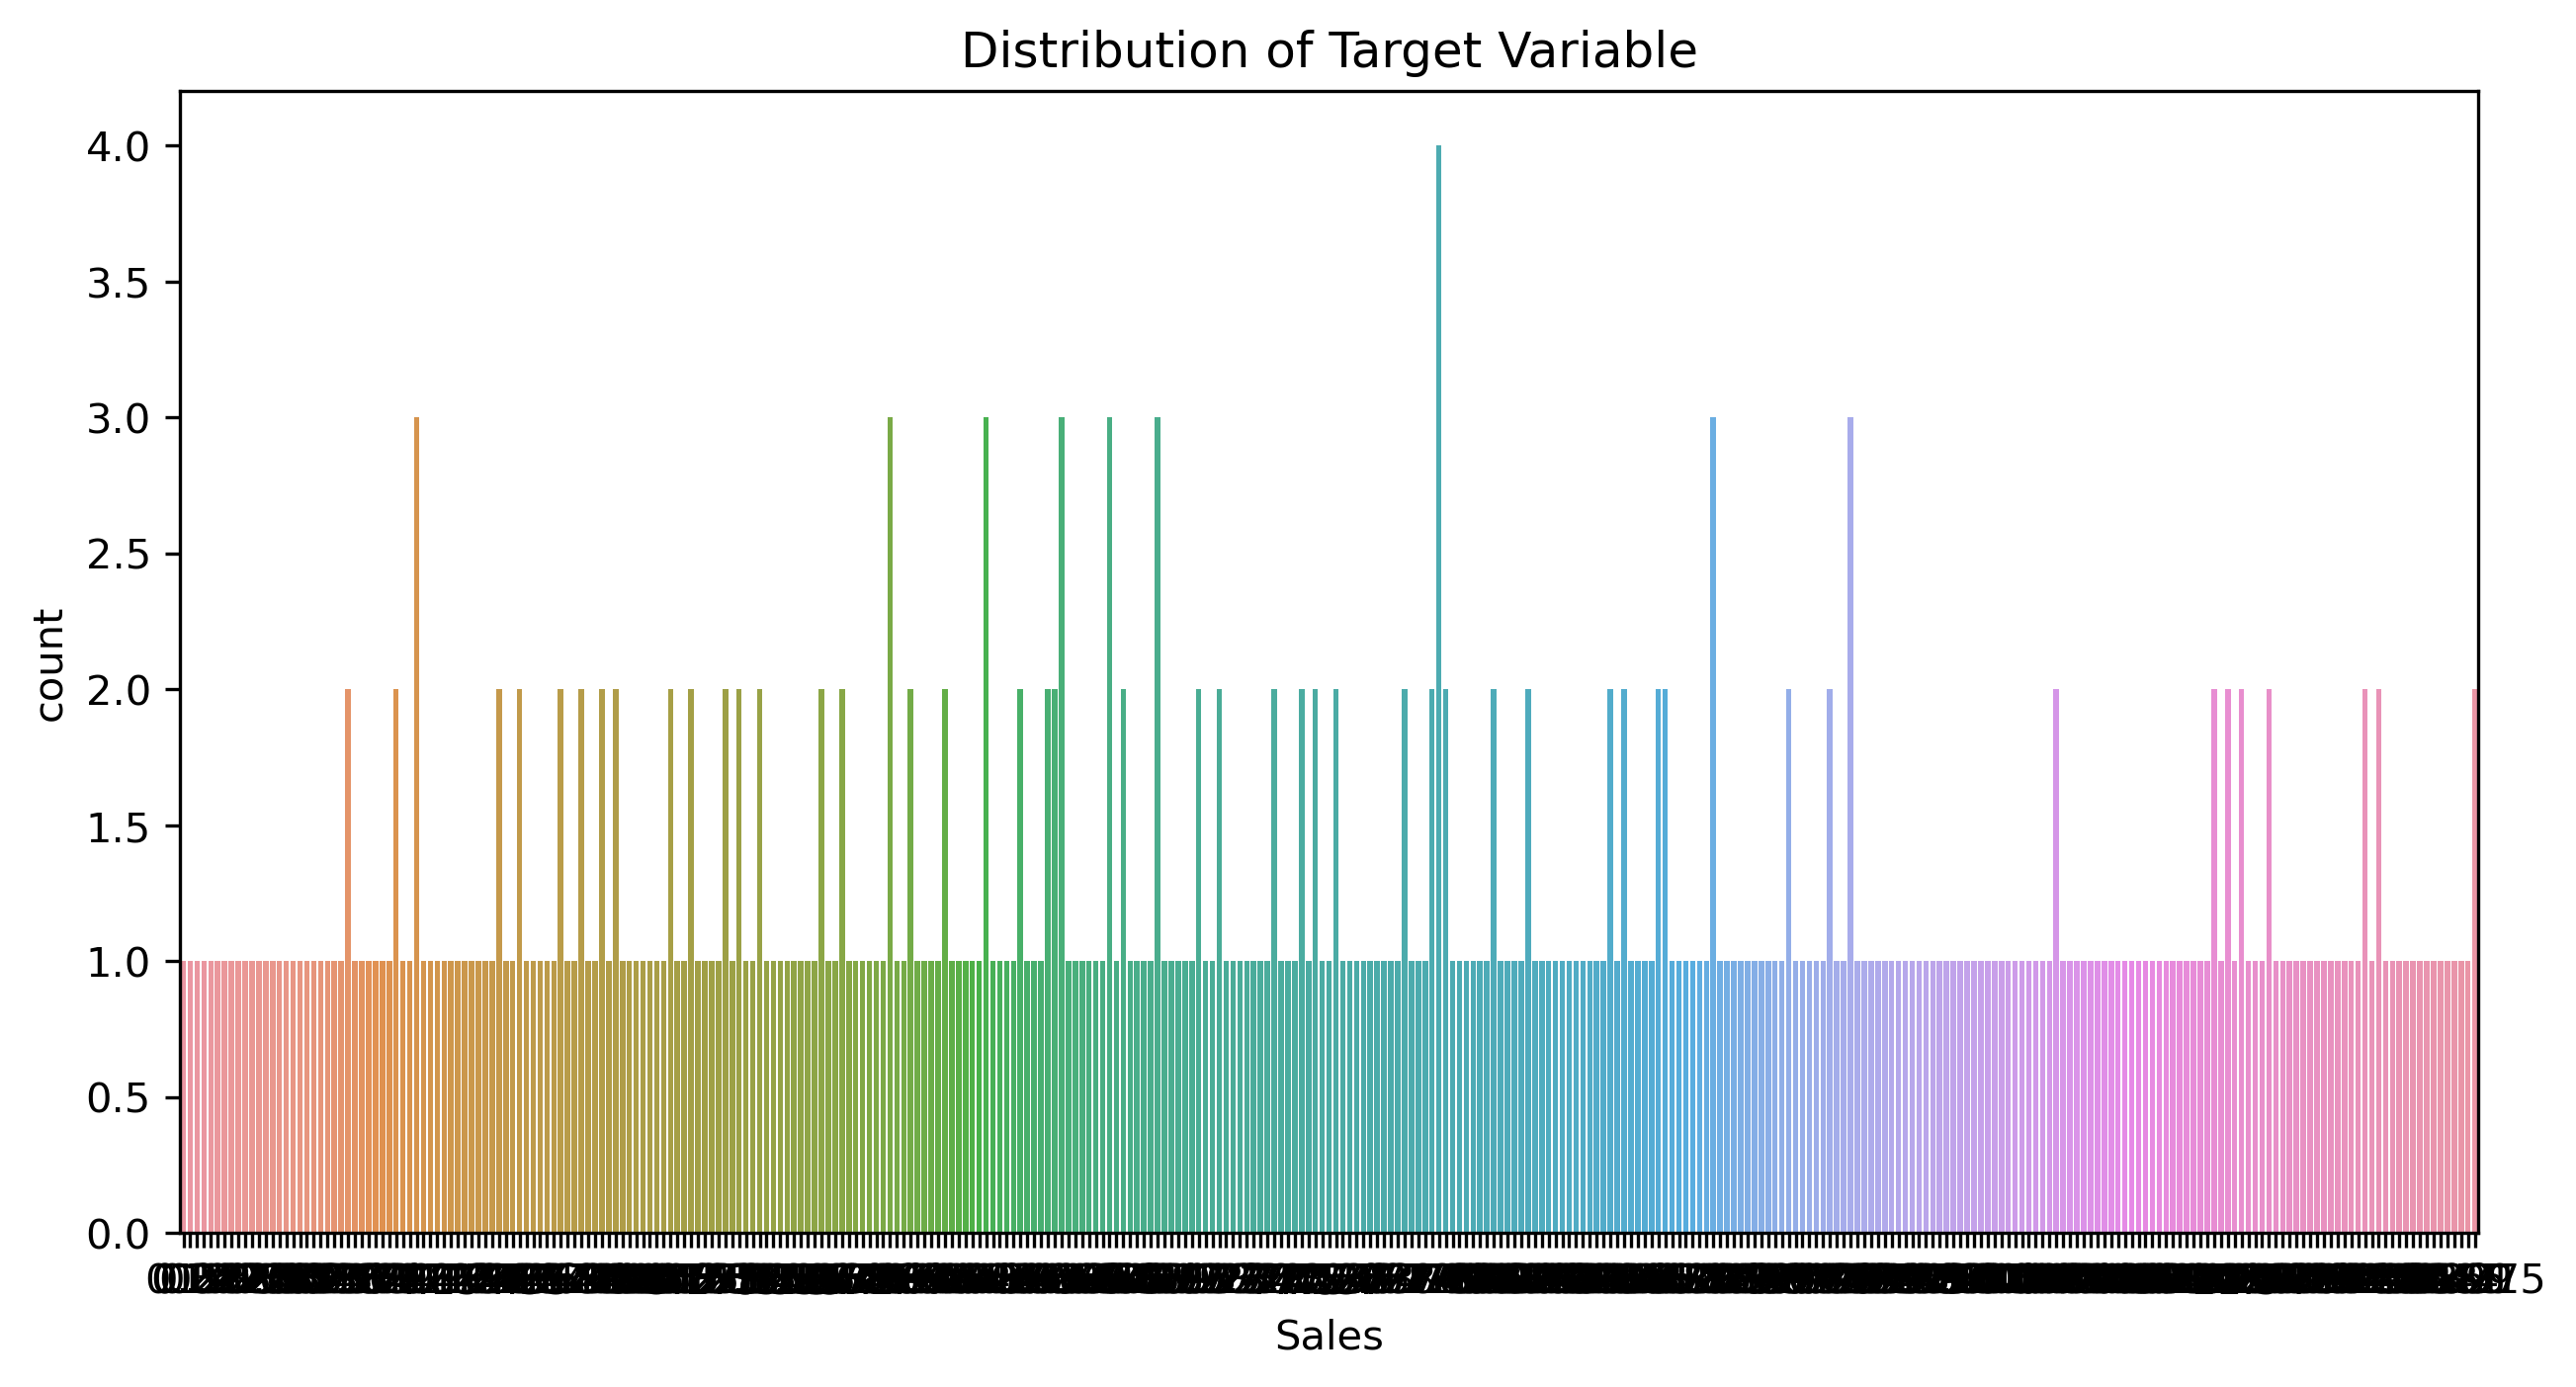

In [14]:
sns.countplot(x='Sales', data=df)
plt.title('Distribution of Target Variable')
plt.show()


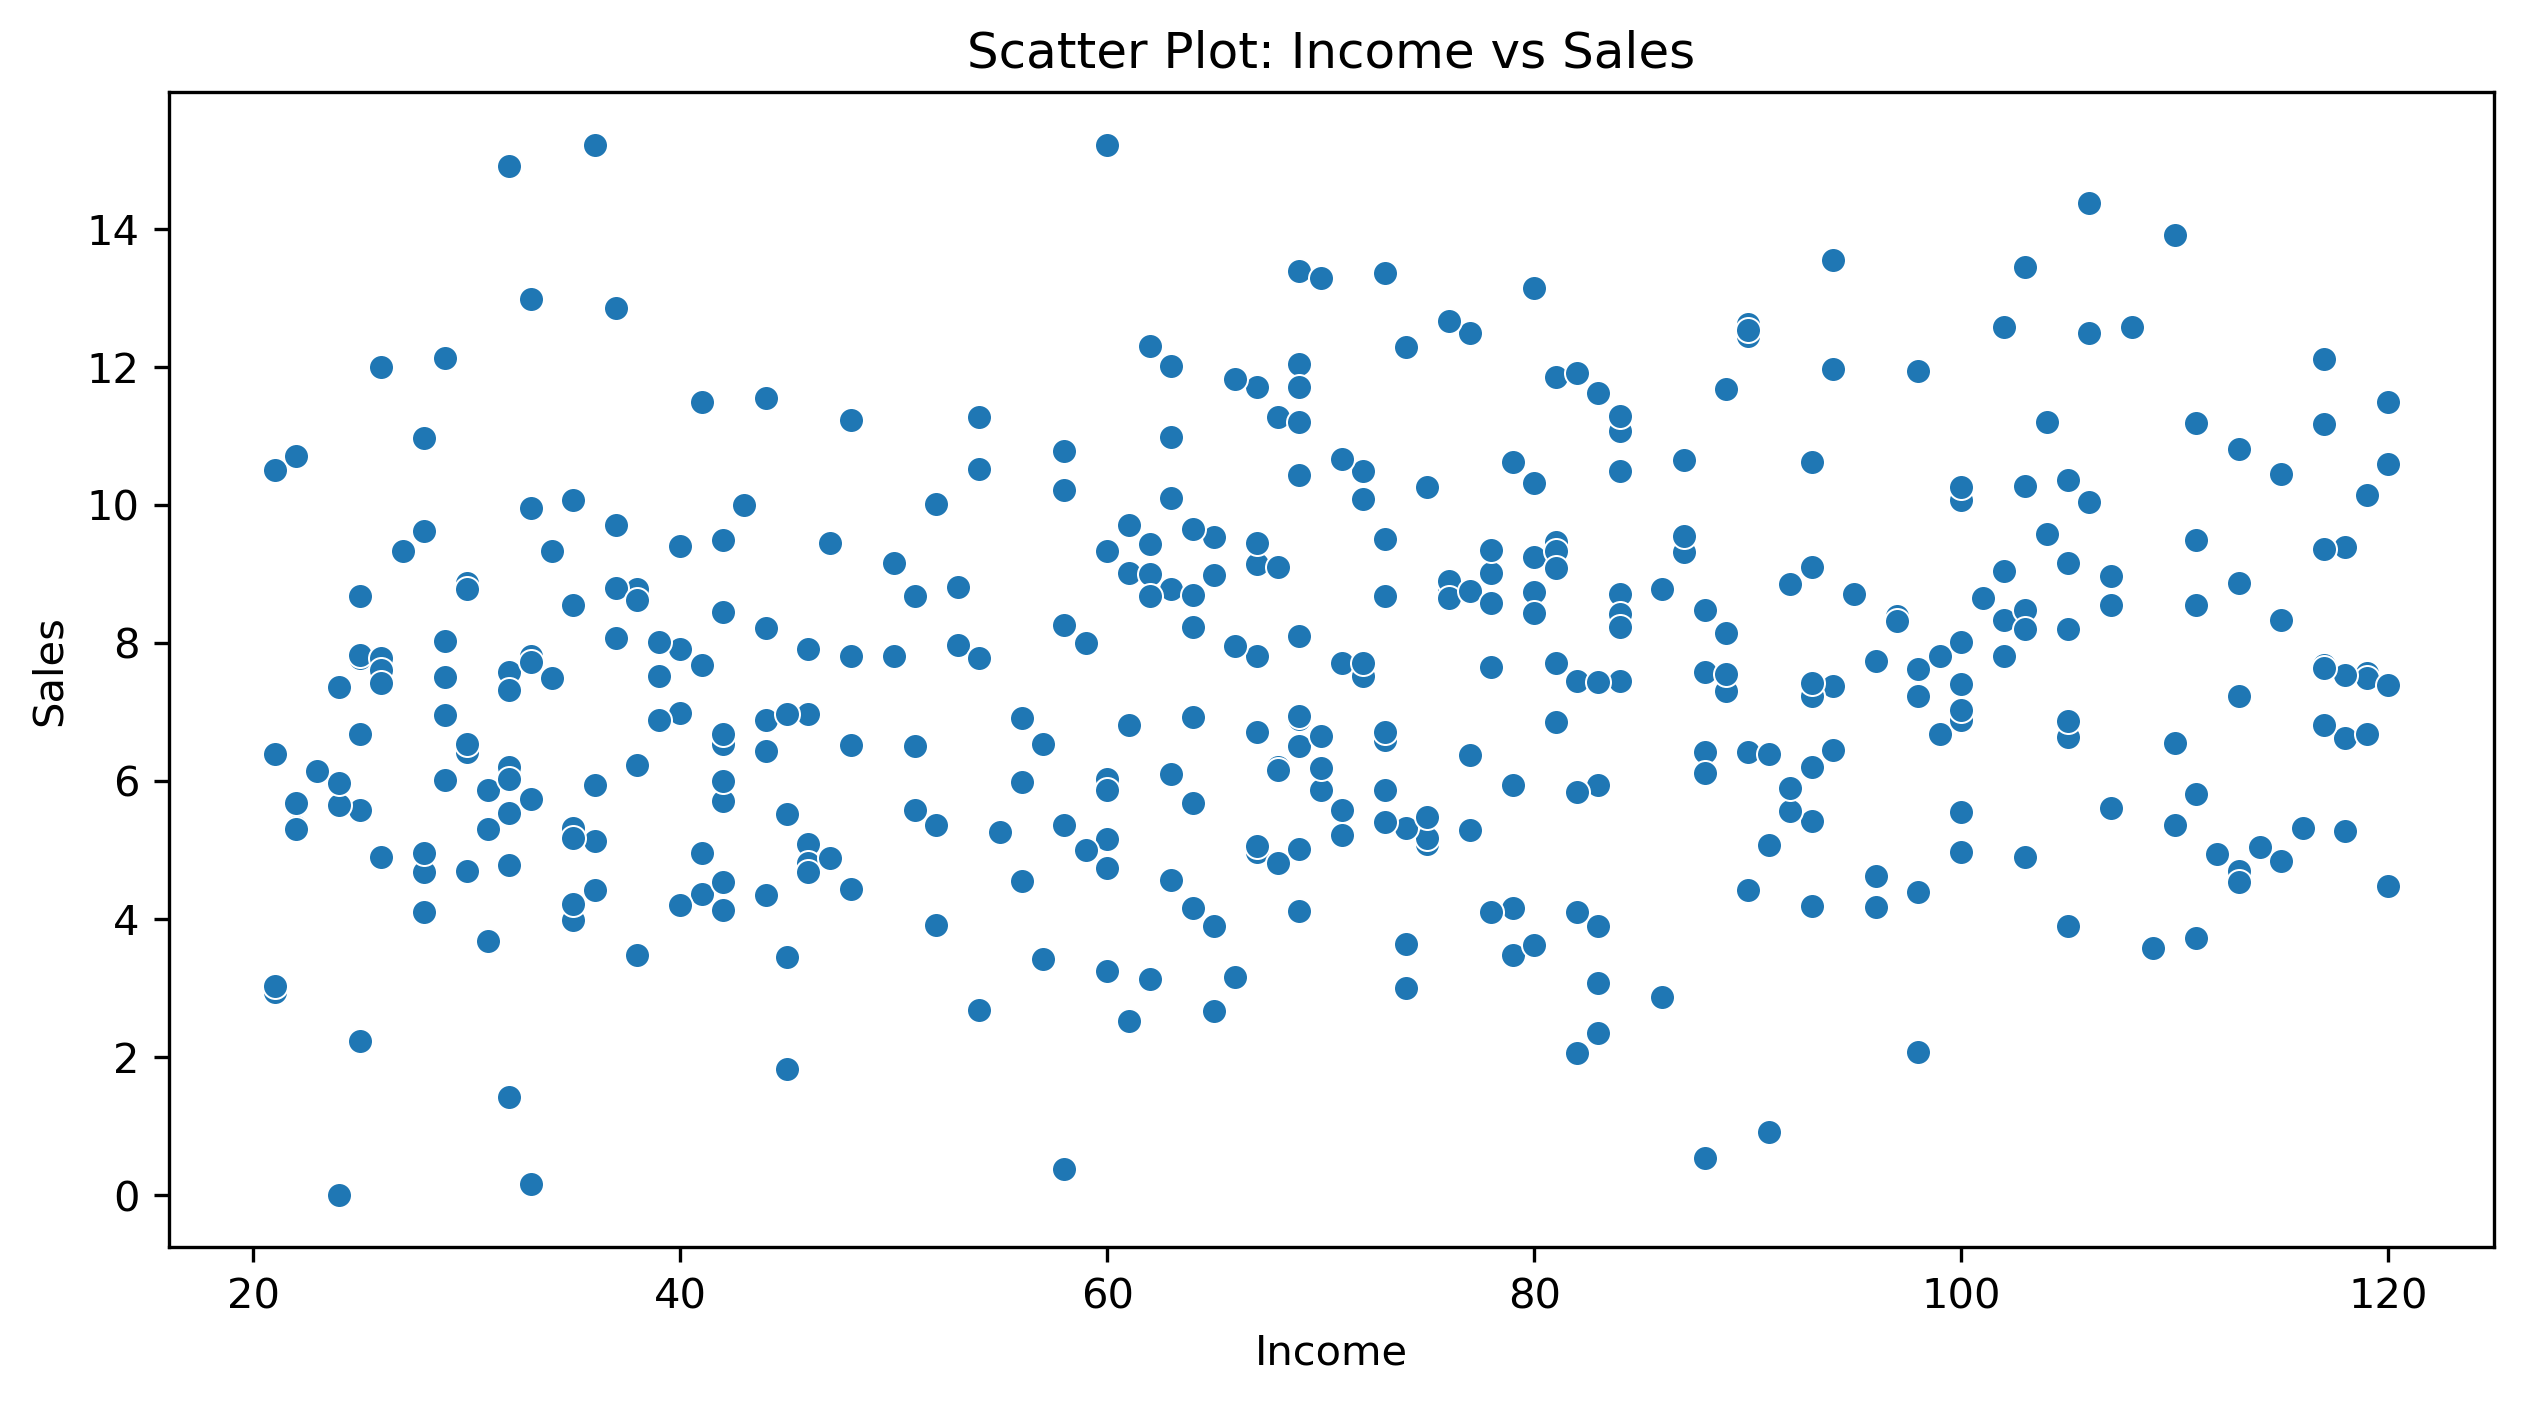

In [15]:
sns.scatterplot(x='Income', y='Sales', data=df)
plt.title('Scatter Plot: Income vs Sales')
plt.xlabel('Income')
plt.ylabel('Sales')
plt.show()

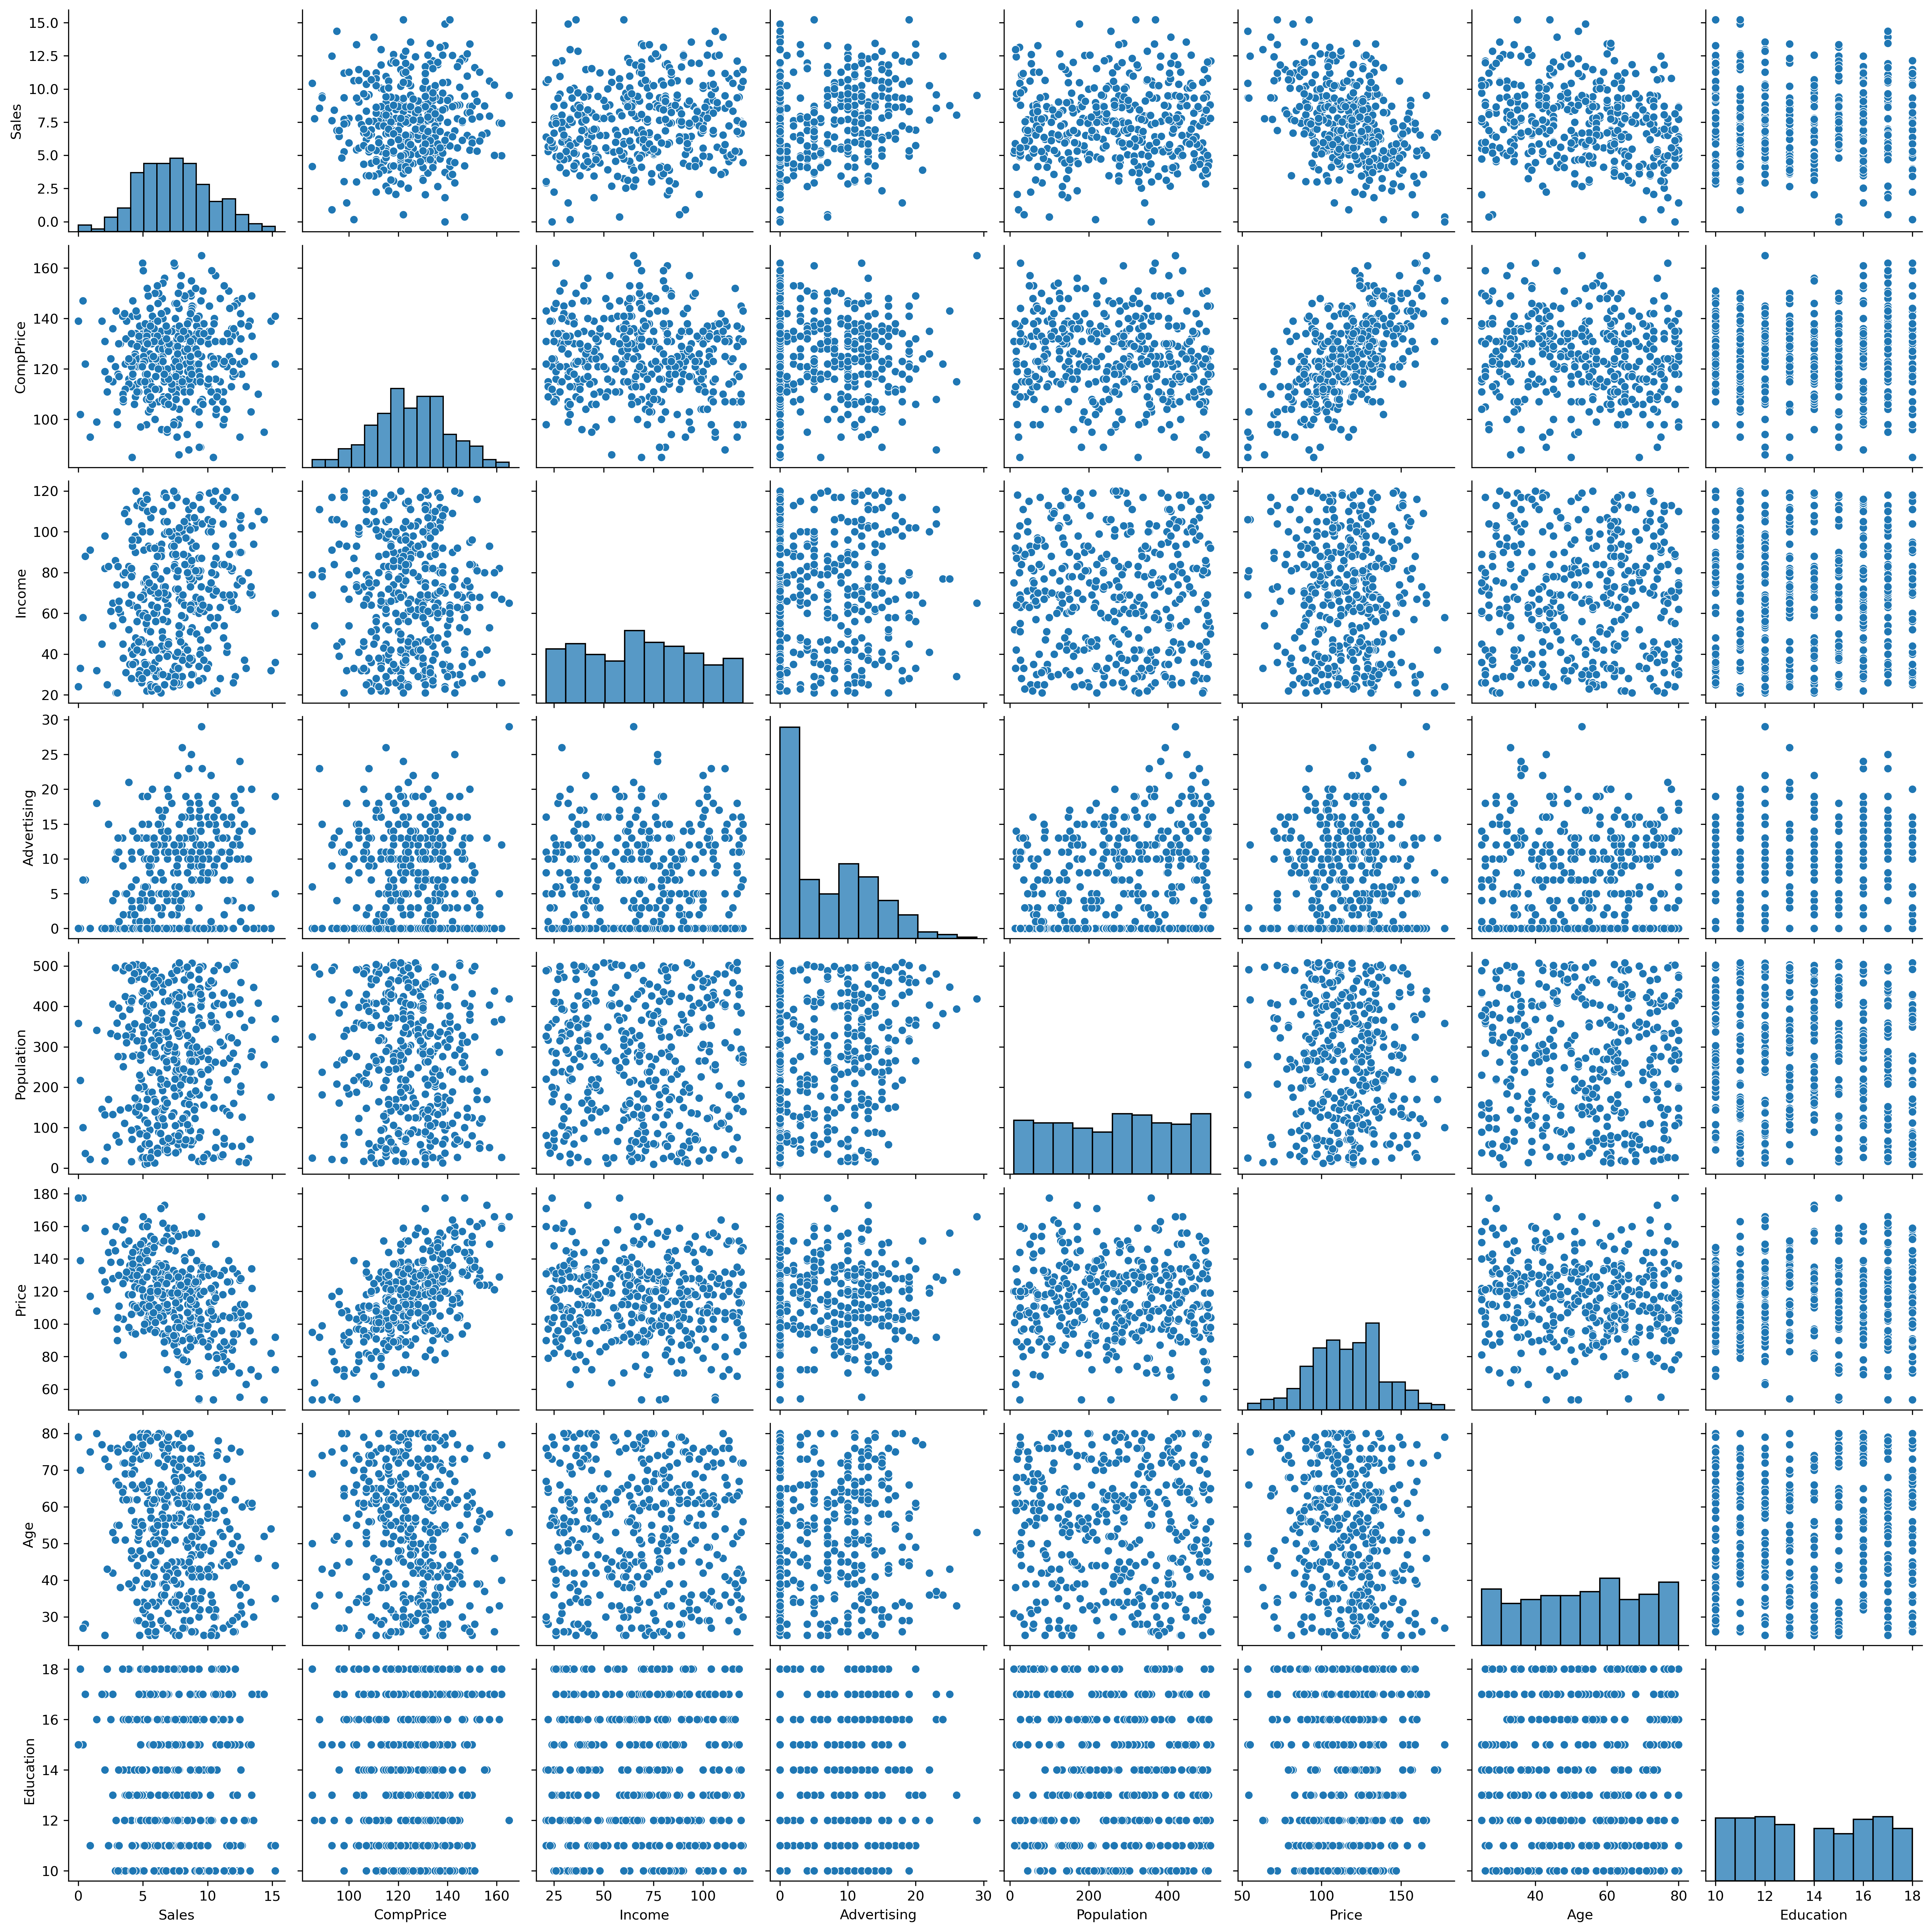

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [18]:
cat_col = df.select_dtypes(object).columns
df[cat_col]

ShelveLoc Urban   US
0         Bad   Yes  Yes
1        Good   Yes  Yes
2      Medium   Yes  Yes
3      Medium   Yes  Yes
4         Bad   Yes   No
..        ...   ...  ...
395      Good   Yes  Yes
396    Medium    No  Yes
397    Medium   Yes  Yes
398       Bad   Yes  Yes
399      Good   Yes  Yes

[400 rows x 3 columns]

In [19]:
df[cat_col] = oe.fit_transform(df[cat_col])

In [20]:
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50      138.0      73           11         276  120.0        0.0   42   
1    11.22      111.0      48           16         260   83.0        1.0   65   
2    10.06      113.0      35           10         269   80.0        2.0   59   
3     7.40      117.0     100            4         466   97.0        2.0   55   
4     4.15      141.0      64            3         340  128.0        0.0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57      138.0     108           17         203  128.0        1.0   33   
396   6.14      139.0      23            3          37  120.0        2.0   55   
397   7.41      162.0      26           12         368  159.0        2.0   40   
398   5.94      100.0      79            7         284   95.0        0.0   50   
399   9.71      134.0      37            0          27  120.0        1.0   49   

     Education  Urban   US  
0           17    1.0  1.0  
1           10    1.0  1.0  
2           12    1.0  1.0  
3           14    1.0  1.0  
4           13    1.0  0.0  
..         ...    ...  ...  
395         14    1.0  1.0  
396         11    0.0  1.0  
397         18    1.0  1.0  
398         12    1.0  1.0  
399         16    1.0  1.0  

[400 rows x 11 columns]

In [21]:
X = df.iloc[:, 1:]
X

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138.0      73           11         276  120.0        0.0   42   
1        111.0      48           16         260   83.0        1.0   65   
2        113.0      35           10         269   80.0        2.0   59   
3        117.0     100            4         466   97.0        2.0   55   
4        141.0      64            3         340  128.0        0.0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395      138.0     108           17         203  128.0        1.0   33   
396      139.0      23            3          37  120.0        2.0   55   
397      162.0      26           12         368  159.0        2.0   40   
398      100.0      79            7         284   95.0        0.0   50   
399      134.0      37            0          27  120.0        1.0   49   

     Education  Urban   US  
0           17    1.0  1.0  
1           10    1.0  1.0  
2           12    1.0  1.0  
3           14    1.0  1.0  
4           13    1.0  0.0  
..         ...    ...  ...  
395         14    1.0  1.0  
396         11    0.0  1.0  
397         18    1.0  1.0  
398         12    1.0  1.0  
399         16    1.0  1.0  

[400 rows x 10 columns]

In [22]:
y = df['Sales']
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)
yp = dtr.predict(X_test)
yp

array([ 6.97,  5.99, 11.82,  3.9 , 11.7 ,  5.17, 10.96,  8.19, 11.85,
       11.54,  6.54, 10.01,  8.68,  6.52,  9.16,  9.34,  3.58, 12.29,
        6.81,  8.7 ,  8.64,  2.52,  7.96,  6.92,  4.53,  4.95,  8.47,
        7.63,  8.7 ,  4.1 , 12.13, 11.28,  4.67,  4.17, 11.28,  4.2 ,
        5.31, 10.07,  9.09,  4.99,  1.42,  8.7 ,  9.33, 10.  ,  7.02,
        9.32,  7.57,  7.71,  5.87,  4.97, 13.36,  9.4 ,  8.68, 11.48,
        7.8 ,  4.74,  5.36,  8.21, 11.96,  8.43,  6.67, 11.28,  5.12,
        4.68,  7.54,  5.87, 12.29,  8.68,  8.32,  8.89,  8.7 ,  5.87,
        8.01,  4.74, 11.18,  5.12, 11.07,  9.39,  6.62,  8.7 ])

In [25]:
dtr.score(X_train, y_train), dtr.score(X_test, y_test)

(1.0, 0.4552281266579902)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [28]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [30]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'random'}

In [31]:
dtr = DecisionTreeRegressor(criterion='squared_error',
                           max_depth=11,splitter='best')

In [32]:
dtr.fit(X_train,y_train)
ypred  = dtr.predict(X_test)

In [33]:
dtr.score(X_train,y_train),dtr.score(X_test,y_test)

(0.9968655660679108, 0.4499862565253574)

In [34]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

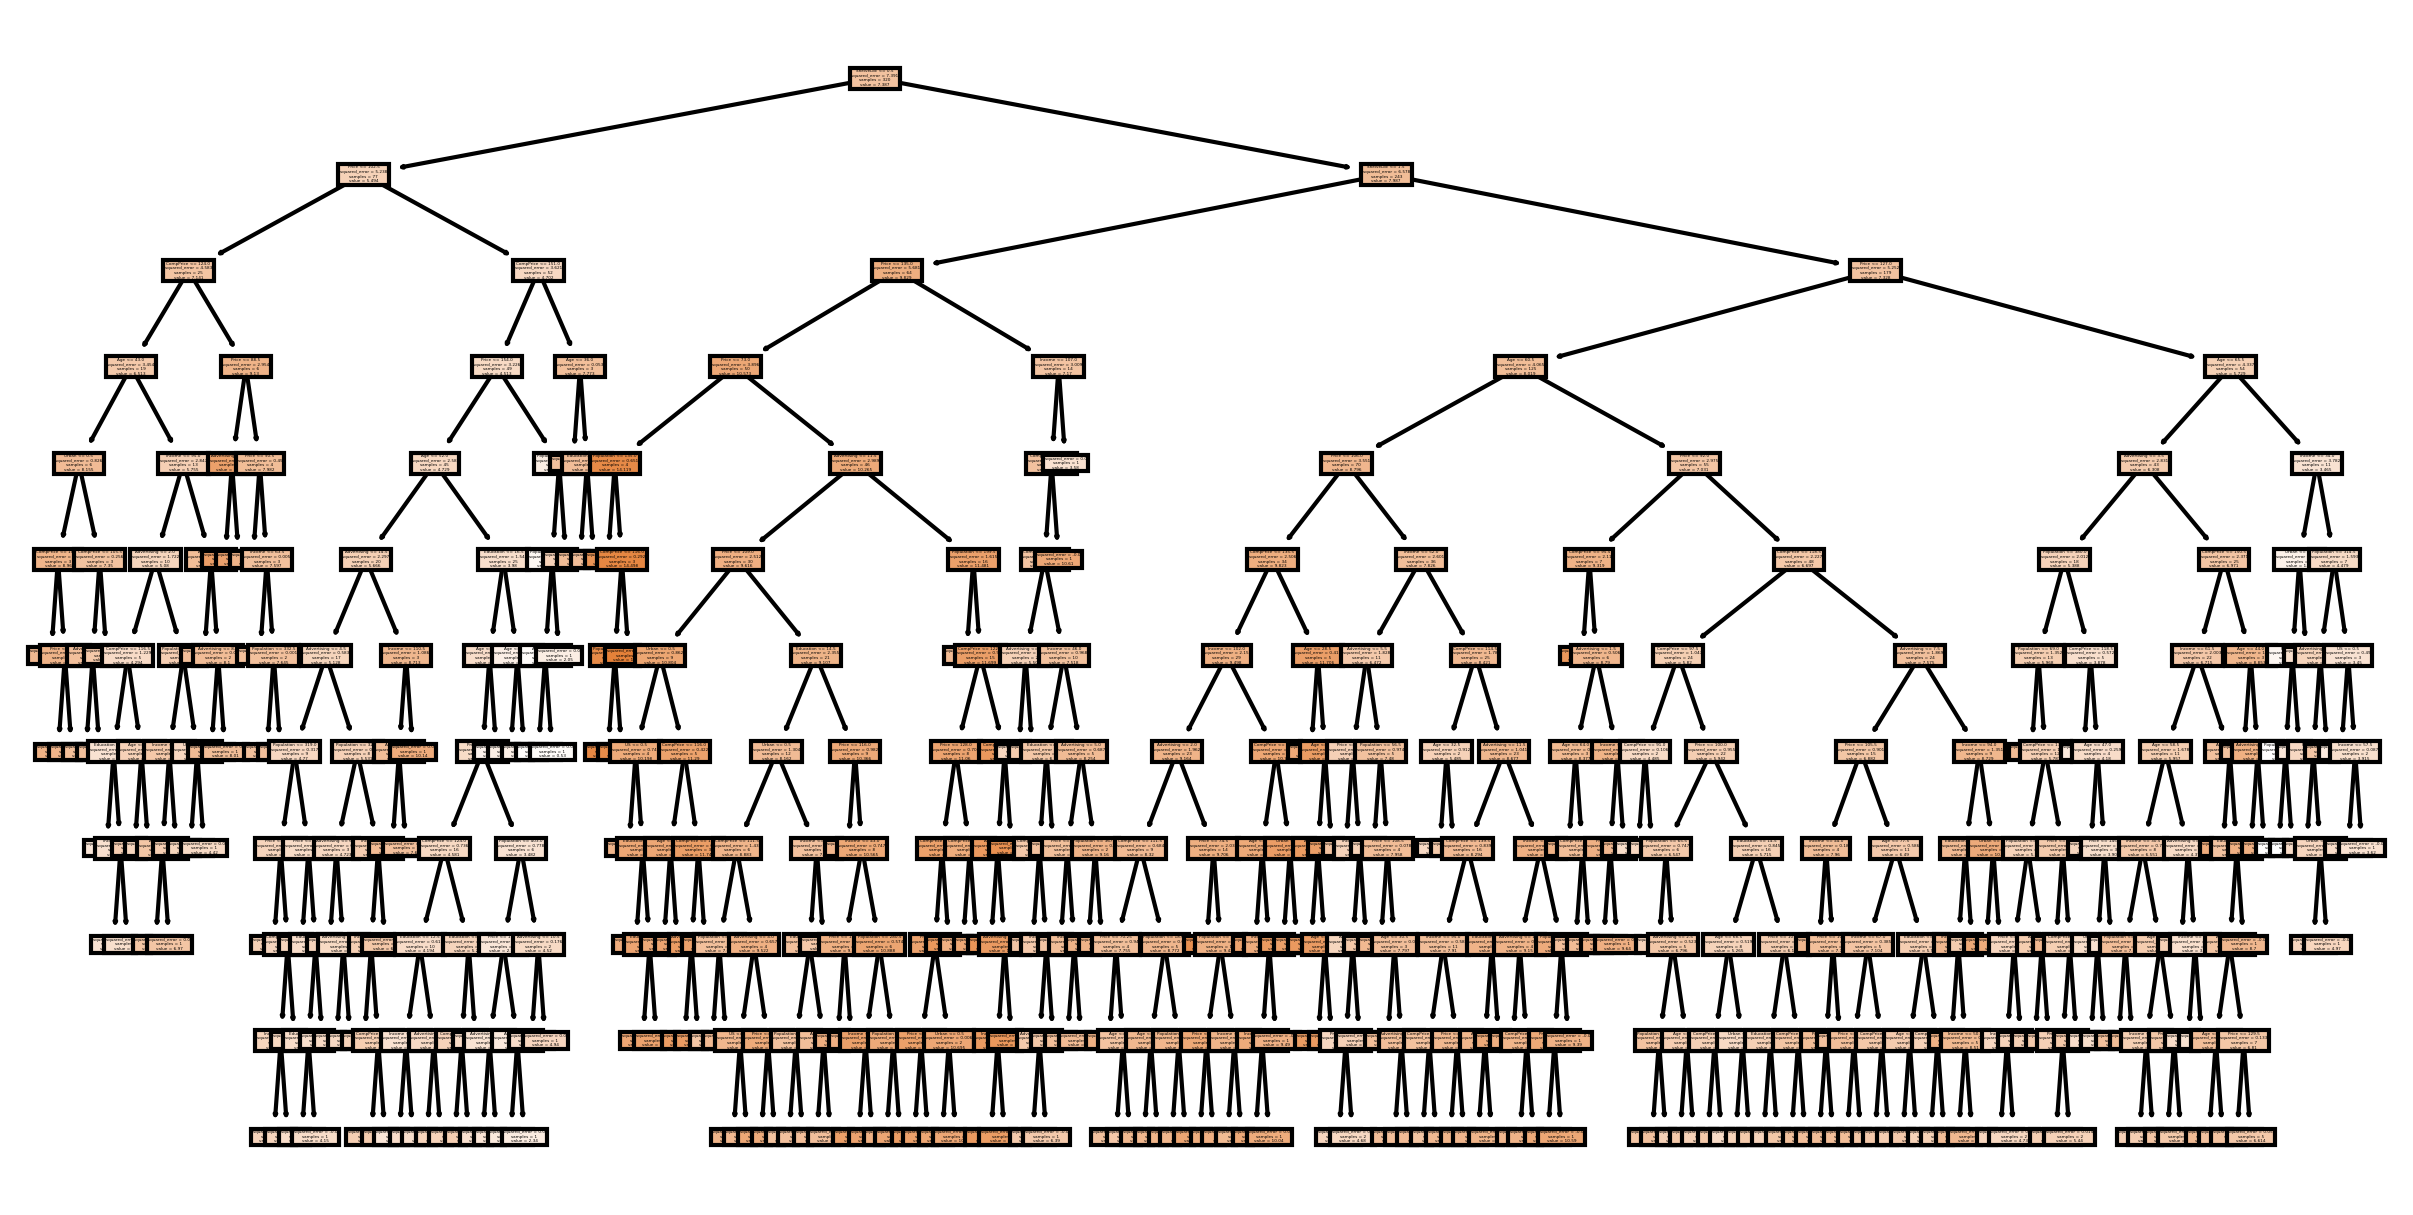

In [37]:
tree.plot_tree(dtr, feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
              filled=True)
plt.show()